# Model Selection and Evaluation
By: Eraldi Skendaj

Since the data has been cleaned up and we've seen that there are correlations between its attributes and have gained a better understanding of the data itself, it is now time to make use of machine learning algorithms to be able make predictions on the diseased state of future patients based on their attributes. The following machine learning algorithms will be use.


#### 1).Logistic Regression
#### 2).Decision Tree
#### 3).Random Forest
#### 4).Support Vector Machine (SVM)
#### 5).K-Nearest Neighbors (K-NN)
#### 6).Naive Bayes
#### 7).Neural Networks
#### 8).XGBoost

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from statsmodels.graphics.mosaicplot import mosaic

## Load the dataset

In [2]:
# Loading the data file
dataset = pd.read_csv('cleaned_data.csv', index_col=0)

In [3]:
# Checking the head of the data
dataset.head(5)

,num_pregnant,glucose,blood_press,skin_fold_thicknes,insulin,BMI,pedigree_function,age,Class
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [4]:
dataset['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

As it can be seen from the results above there are almost 2 times more healthy patients (500 in Class =0) than there are unhealthy patients (268 in Class =1 ).

## Spliting the data into Training and Test Sets

In [5]:
# First we declare the dependent (y) and independent (X) variables:

X = dataset.drop('Class', axis=1)
y = dataset['Class']

# The dataset will then be split using a 70% to 30% ratio. 70% of the data will be used to train the algorithms, while
# 30% of the data will test the algorithm.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 101)

## Feature Scaling

At this point we will standardize our data, to make sure that no particular feature dominates another feature. This is a critical step. Some of the machine learning algoritms will produce results that are not realistic if the variables are not scaled.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
X_train = scaler.fit_transform(X_train)

In [9]:
X_test = scaler.transform(X_test)

## Model Training

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [40]:
# Writing a function to automate fitting the classifiers and evaluate the algorithms

def classifier(model,train_independent,train_dependent,test_independent,true):
    model.fit(train_independent,train_dependent)
    prediction = model.predict(X_test)
    print(classification_report(true,prediction))
    
    # Confusion Matrix plot
    
    cm = confusion_matrix(y_test,prediction)
    fig= plot_confusion_matrix(conf_mat=cm,figsize=(4,4),cmap=plt.cm.Reds,hide_spines=True)
    plt.title('Confusion Matrix',fontsize=14)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.grid('off')
    plt.show()


    # 10-fold Cross Validation
    accuracies = cross_val_score(estimator= model,X= X_train,y=y_train,cv=10)
    print("The average model accuracy score is : %s" % "{0:.2%}".format(accuracies.mean()))
    print("The average accuracy score standard deviation is : %s" % "{0:.3%}".format(accuracies.std()))
    
    # Values of the ROC Curve as a probabilistic approach to classification
    roc_predict = model.predict_proba(X_test)
    roc_predict = [p[1] for p in roc_predict]
    area = roc_auc_score(y_test,roc_predict)
    float(area)
    print ("The area under the Reciver Operating Characteristic curve is: ", (round(area,2)))




# Machine Learning Algorithms

## 1. Logistic Regression 

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log_reg = LogisticRegression()

             precision    recall  f1-score   support

          0       0.80      0.89      0.84       150
          1       0.74      0.59      0.66        81

avg / total       0.78      0.78      0.78       231



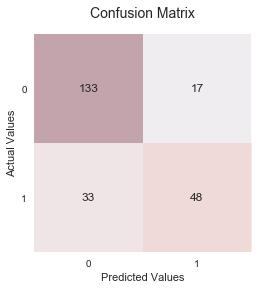

The average model accuracy score is : 77.09%
The average accuracy score standard deviation is : 4.315%
The area under the Reciver Operating Characteristic curve is:  0.85


In [43]:
classifier(log_reg,X_train,y_train,X_test,y_test)

## 2. Decision Trees

             precision    recall  f1-score   support

          0       0.80      0.72      0.76       150
          1       0.56      0.67      0.61        81

avg / total       0.72      0.70      0.71       231



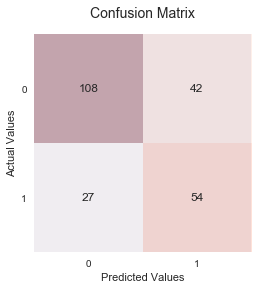

The average model accuracy score is : 67.81%
The average accuracy score standard deviation is : 4.765%
The area under the Reciver Operating Characteristic curve is:  0.69


In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
classifier (dtree,X_train,y_train,X_test,y_test)

## 3. Random Forest

             precision    recall  f1-score   support

          0       0.81      0.84      0.82       150
          1       0.68      0.63      0.65        81

avg / total       0.76      0.77      0.76       231



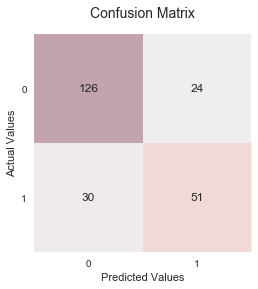

The average model accuracy score is : 74.86%
The average accuracy score standard deviation is : 5.856%
The area under the Reciver Operating Characteristic curve is:  0.84


In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
classifier(rfc,X_train,y_train,X_test,y_test)

## 4. Support Vector Machines (SVM)

             precision    recall  f1-score   support

          0       0.86      0.77      0.81       150
          1       0.64      0.78      0.70        81

avg / total       0.79      0.77      0.77       231



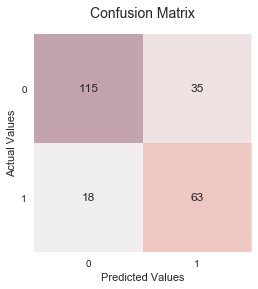

The average model accuracy score is : 73.92%
The average accuracy score standard deviation is : 5.690%
The area under the Reciver Operating Characteristic curve is:  0.84


In [17]:
from sklearn.svm import SVC
sv_model = SVC(class_weight='balanced', probability= True)
classifier(sv_model, X_train,y_train,X_test,y_test)

# 5. K - Nearest neighbors (KNN)

             precision    recall  f1-score   support

          0       0.76      0.90      0.83       150
          1       0.72      0.48      0.58        81

avg / total       0.75      0.75      0.74       231



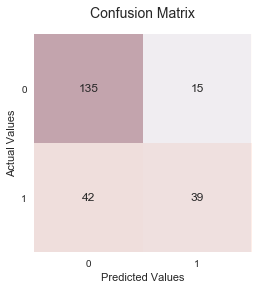

The average model accuracy score is : 76.34%
The average accuracy score standard deviation is : 3.587%
The area under the Reciver Operating Characteristic curve is:  0.83


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
classifier(knn, X_train,y_train,X_test,y_test)

# 6. Naive Bayes

             precision    recall  f1-score   support

          0       0.80      0.83      0.81       150
          1       0.66      0.62      0.64        81

avg / total       0.75      0.75      0.75       231



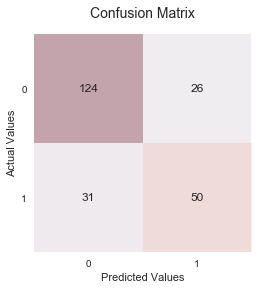

The average model accuracy score is : 74.66%
The average accuracy score standard deviation is : 4.516%
The area under the Reciver Operating Characteristic curve is:  0.83


In [19]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
classifier(nb, X_train,y_train,X_test,y_test)

## 7. Neural Networks

In [53]:
# Using the Stratified KFold algorithm  to validate the Neural network algorithm since it preserves the number of 
#instances of each class in each fold.

#Importing the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
import numpy

# 10-fold Stratified KFold cross validation test. The results will be saved in the list cvscores.
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
cvscores = []

# The for loop will first run the neural network algorithm, then cross validate it.
for train, test in kfold.split(X, y):
    
# Creating and initializing the neural network.

    nn_classifier = Sequential()
    
# Creating the first input and the first hidden layer.
    nn_classifier.add(Dense(units=10, input_dim=8, activation='relu',kernel_initializer= 'uniform'))
    
# Creating the second hidden layer.
    nn_classifier.add(Dense(units =10, activation='relu',kernel_initializer='uniform'))
    
#Creating the output layer.
    nn_classifier.add(Dense(units =1, activation='sigmoid',kernel_initializer='uniform'))
    
    
# Compiling the model.
    nn_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model for 150 epochs
    nn_classifier.fit(X_train, y_train, epochs=150, batch_size=10,verbose=2)
    
# Evaluate the model
    scores = nn_classifier.evaluate(X_test, y_test)
    nn_classifier.metrics_names[1], scores[1]*100
    cvscores.append(scores[1] * 100)



Epoch 1/150
 - 1s - loss: 0.6902 - acc: 0.6406
Epoch 2/150
 - 0s - loss: 0.6711 - acc: 0.6518
Epoch 3/150
 - 0s - loss: 0.6051 - acc: 0.6518
Epoch 4/150
 - 0s - loss: 0.5379 - acc: 0.6946
Epoch 5/150
 - 0s - loss: 0.5052 - acc: 0.7654
Epoch 6/150
 - 0s - loss: 0.4880 - acc: 0.7709
Epoch 7/150
 - 0s - loss: 0.4762 - acc: 0.7728
Epoch 8/150
 - 0s - loss: 0.4684 - acc: 0.7728
Epoch 9/150
 - 0s - loss: 0.4617 - acc: 0.7747
Epoch 10/150
 - 0s - loss: 0.4565 - acc: 0.7709
Epoch 11/150
 - 0s - loss: 0.4533 - acc: 0.7709
Epoch 12/150
 - 0s - loss: 0.4497 - acc: 0.7765
Epoch 13/150
 - 0s - loss: 0.4469 - acc: 0.7728
Epoch 14/150
 - 0s - loss: 0.4462 - acc: 0.7747
Epoch 15/150
 - 0s - loss: 0.4429 - acc: 0.7765
Epoch 16/150
 - 0s - loss: 0.4420 - acc: 0.7765
Epoch 17/150
 - 0s - loss: 0.4420 - acc: 0.7728
Epoch 18/150
 - 0s - loss: 0.4397 - acc: 0.7765
Epoch 19/150
 - 0s - loss: 0.4387 - acc: 0.7747
Epoch 20/150
 - 0s - loss: 0.4399 - acc: 0.7747
Epoch 21/150
 - 0s - loss: 0.4373 - acc: 0.7858
E

Epoch 20/150
 - 0s - loss: 0.4418 - acc: 0.7821
Epoch 21/150
 - 0s - loss: 0.4414 - acc: 0.7821
Epoch 22/150
 - 0s - loss: 0.4418 - acc: 0.7821
Epoch 23/150
 - 0s - loss: 0.4400 - acc: 0.7933
Epoch 24/150
 - 0s - loss: 0.4383 - acc: 0.7914
Epoch 25/150
 - 0s - loss: 0.4381 - acc: 0.7933
Epoch 26/150
 - 0s - loss: 0.4374 - acc: 0.7933
Epoch 27/150
 - 0s - loss: 0.4369 - acc: 0.7952
Epoch 28/150
 - 0s - loss: 0.4366 - acc: 0.7877
Epoch 29/150
 - 0s - loss: 0.4353 - acc: 0.7970
Epoch 30/150
 - 0s - loss: 0.4348 - acc: 0.7933
Epoch 31/150
 - 0s - loss: 0.4345 - acc: 0.7970
Epoch 32/150
 - 0s - loss: 0.4347 - acc: 0.7877
Epoch 33/150
 - 0s - loss: 0.4338 - acc: 0.7896
Epoch 34/150
 - 0s - loss: 0.4331 - acc: 0.7877
Epoch 35/150
 - 0s - loss: 0.4327 - acc: 0.7914
Epoch 36/150
 - 0s - loss: 0.4324 - acc: 0.7896
Epoch 37/150
 - 0s - loss: 0.4322 - acc: 0.7952
Epoch 38/150
 - 0s - loss: 0.4307 - acc: 0.7877
Epoch 39/150
 - 0s - loss: 0.4311 - acc: 0.7914
Epoch 40/150
 - 0s - loss: 0.4306 - acc:

Epoch 39/150
 - 0s - loss: 0.4313 - acc: 0.7933
Epoch 40/150
 - 0s - loss: 0.4310 - acc: 0.7914
Epoch 41/150
 - 0s - loss: 0.4311 - acc: 0.7858
Epoch 42/150
 - 0s - loss: 0.4291 - acc: 0.7896
Epoch 43/150
 - 0s - loss: 0.4293 - acc: 0.7914
Epoch 44/150
 - 0s - loss: 0.4286 - acc: 0.7914
Epoch 45/150
 - 0s - loss: 0.4286 - acc: 0.7877
Epoch 46/150
 - 0s - loss: 0.4265 - acc: 0.7914
Epoch 47/150
 - 0s - loss: 0.4265 - acc: 0.7914
Epoch 48/150
 - 0s - loss: 0.4269 - acc: 0.7858
Epoch 49/150
 - 0s - loss: 0.4253 - acc: 0.7970
Epoch 50/150
 - 0s - loss: 0.4245 - acc: 0.7989
Epoch 51/150
 - 0s - loss: 0.4242 - acc: 0.7914
Epoch 52/150
 - 0s - loss: 0.4239 - acc: 0.7989
Epoch 53/150
 - 0s - loss: 0.4239 - acc: 0.8026
Epoch 54/150
 - 0s - loss: 0.4233 - acc: 0.7933
Epoch 55/150
 - 0s - loss: 0.4227 - acc: 0.8007
Epoch 56/150
 - 0s - loss: 0.4222 - acc: 0.8045
Epoch 57/150
 - 0s - loss: 0.4223 - acc: 0.8063
Epoch 58/150
 - 0s - loss: 0.4215 - acc: 0.8045
Epoch 59/150
 - 0s - loss: 0.4215 - acc:

Epoch 58/150
 - 0s - loss: 0.4246 - acc: 0.7989
Epoch 59/150
 - 0s - loss: 0.4244 - acc: 0.7970
Epoch 60/150
 - 0s - loss: 0.4245 - acc: 0.7896
Epoch 61/150
 - 0s - loss: 0.4239 - acc: 0.7970
Epoch 62/150
 - 0s - loss: 0.4241 - acc: 0.7970
Epoch 63/150
 - 0s - loss: 0.4238 - acc: 0.7952
Epoch 64/150
 - 0s - loss: 0.4234 - acc: 0.7989
Epoch 65/150
 - 0s - loss: 0.4233 - acc: 0.7970
Epoch 66/150
 - 0s - loss: 0.4233 - acc: 0.7989
Epoch 67/150
 - 0s - loss: 0.4228 - acc: 0.7989
Epoch 68/150
 - 0s - loss: 0.4233 - acc: 0.8007
Epoch 69/150
 - 0s - loss: 0.4220 - acc: 0.7970
Epoch 70/150
 - 0s - loss: 0.4220 - acc: 0.7933
Epoch 71/150
 - 0s - loss: 0.4230 - acc: 0.8007
Epoch 72/150
 - 0s - loss: 0.4225 - acc: 0.7989
Epoch 73/150
 - 0s - loss: 0.4214 - acc: 0.7989
Epoch 74/150
 - 0s - loss: 0.4211 - acc: 0.8007
Epoch 75/150
 - 0s - loss: 0.4208 - acc: 0.8026
Epoch 76/150
 - 0s - loss: 0.4205 - acc: 0.8007
Epoch 77/150
 - 0s - loss: 0.4205 - acc: 0.8007
Epoch 78/150
 - 0s - loss: 0.4219 - acc:

Epoch 77/150
 - 0s - loss: 0.4093 - acc: 0.8138
Epoch 78/150
 - 0s - loss: 0.4103 - acc: 0.8063
Epoch 79/150
 - 0s - loss: 0.4105 - acc: 0.8045
Epoch 80/150
 - 0s - loss: 0.4095 - acc: 0.8063
Epoch 81/150
 - 0s - loss: 0.4089 - acc: 0.8082
Epoch 82/150
 - 0s - loss: 0.4078 - acc: 0.8082
Epoch 83/150
 - 0s - loss: 0.4074 - acc: 0.8082
Epoch 84/150
 - 0s - loss: 0.4072 - acc: 0.8101
Epoch 85/150
 - 0s - loss: 0.4077 - acc: 0.8082
Epoch 86/150
 - 0s - loss: 0.4068 - acc: 0.8138
Epoch 87/150
 - 0s - loss: 0.4064 - acc: 0.8101
Epoch 88/150
 - 0s - loss: 0.4066 - acc: 0.8119
Epoch 89/150
 - 0s - loss: 0.4057 - acc: 0.8101
Epoch 90/150
 - 0s - loss: 0.4054 - acc: 0.8082
Epoch 91/150
 - 0s - loss: 0.4048 - acc: 0.8101
Epoch 92/150
 - 0s - loss: 0.4076 - acc: 0.8156
Epoch 93/150
 - 0s - loss: 0.4059 - acc: 0.8101
Epoch 94/150
 - 0s - loss: 0.4059 - acc: 0.8119
Epoch 95/150
 - 0s - loss: 0.4043 - acc: 0.8138
Epoch 96/150
 - 0s - loss: 0.4050 - acc: 0.8119
Epoch 97/150
 - 0s - loss: 0.4037 - acc:

Epoch 96/150
 - 0s - loss: 0.4133 - acc: 0.8007
Epoch 97/150
 - 0s - loss: 0.4124 - acc: 0.7970
Epoch 98/150
 - 0s - loss: 0.4129 - acc: 0.8007
Epoch 99/150
 - 0s - loss: 0.4124 - acc: 0.8007
Epoch 100/150
 - 0s - loss: 0.4116 - acc: 0.8026
Epoch 101/150
 - 0s - loss: 0.4115 - acc: 0.7952
Epoch 102/150
 - 0s - loss: 0.4125 - acc: 0.8026
Epoch 103/150
 - 0s - loss: 0.4126 - acc: 0.7933
Epoch 104/150
 - 0s - loss: 0.4126 - acc: 0.8101
Epoch 105/150
 - 0s - loss: 0.4124 - acc: 0.7933
Epoch 106/150
 - 0s - loss: 0.4123 - acc: 0.8045
Epoch 107/150
 - 0s - loss: 0.4119 - acc: 0.7989
Epoch 108/150
 - 0s - loss: 0.4128 - acc: 0.8026
Epoch 109/150
 - 0s - loss: 0.4113 - acc: 0.7952
Epoch 110/150
 - 0s - loss: 0.4101 - acc: 0.8026
Epoch 111/150
 - 0s - loss: 0.4117 - acc: 0.7970
Epoch 112/150
 - 0s - loss: 0.4109 - acc: 0.8026
Epoch 113/150
 - 0s - loss: 0.4096 - acc: 0.8045
Epoch 114/150
 - 0s - loss: 0.4107 - acc: 0.8007
Epoch 115/150
 - 0s - loss: 0.4103 - acc: 0.8026
Epoch 116/150
 - 0s - lo

Epoch 115/150
 - 0s - loss: 0.4074 - acc: 0.8007
Epoch 116/150
 - 0s - loss: 0.4069 - acc: 0.8026
Epoch 117/150
 - 0s - loss: 0.4056 - acc: 0.8045
Epoch 118/150
 - 0s - loss: 0.4063 - acc: 0.8026
Epoch 119/150
 - 0s - loss: 0.4069 - acc: 0.8026
Epoch 120/150
 - 0s - loss: 0.4062 - acc: 0.8007
Epoch 121/150
 - 0s - loss: 0.4062 - acc: 0.7989
Epoch 122/150
 - 0s - loss: 0.4057 - acc: 0.8063
Epoch 123/150
 - 0s - loss: 0.4051 - acc: 0.8026
Epoch 124/150
 - 0s - loss: 0.4061 - acc: 0.7989
Epoch 125/150
 - 0s - loss: 0.4058 - acc: 0.8026
Epoch 126/150
 - 0s - loss: 0.4047 - acc: 0.8007
Epoch 127/150
 - 0s - loss: 0.4044 - acc: 0.8045
Epoch 128/150
 - 0s - loss: 0.4047 - acc: 0.8007
Epoch 129/150
 - 0s - loss: 0.4044 - acc: 0.8045
Epoch 130/150
 - 0s - loss: 0.4040 - acc: 0.8026
Epoch 131/150
 - 0s - loss: 0.4040 - acc: 0.8063
Epoch 132/150
 - 0s - loss: 0.4043 - acc: 0.8045
Epoch 133/150
 - 0s - loss: 0.4045 - acc: 0.8026
Epoch 134/150
 - 0s - loss: 0.4039 - acc: 0.8045
Epoch 135/150
 - 0s 

 - 0s - loss: 0.3952 - acc: 0.8231
Epoch 134/150
 - 0s - loss: 0.3949 - acc: 0.8156
Epoch 135/150
 - 0s - loss: 0.3950 - acc: 0.8212
Epoch 136/150
 - 0s - loss: 0.3948 - acc: 0.8212
Epoch 137/150
 - 0s - loss: 0.3953 - acc: 0.8212
Epoch 138/150
 - 0s - loss: 0.3942 - acc: 0.8194
Epoch 139/150
 - 0s - loss: 0.3937 - acc: 0.8231
Epoch 140/150
 - 0s - loss: 0.3928 - acc: 0.8250
Epoch 141/150
 - 0s - loss: 0.3927 - acc: 0.8250
Epoch 142/150
 - 0s - loss: 0.3920 - acc: 0.8231
Epoch 143/150
 - 0s - loss: 0.3918 - acc: 0.8268
Epoch 144/150
 - 0s - loss: 0.3912 - acc: 0.8231
Epoch 145/150
 - 0s - loss: 0.3932 - acc: 0.8156
Epoch 146/150
 - 0s - loss: 0.3905 - acc: 0.8250
Epoch 147/150
 - 0s - loss: 0.3917 - acc: 0.8305
Epoch 148/150
 - 0s - loss: 0.3906 - acc: 0.8231
Epoch 149/150
 - 0s - loss: 0.3906 - acc: 0.8231
Epoch 150/150
 - 0s - loss: 0.3894 - acc: 0.8231
231/231 [==============================] - 1s 4ms/step
Epoch 1/150
 - 2s - loss: 0.6897 - acc: 0.6369
Epoch 2/150
 - 0s - loss: 0.66

231/231 [==============================] - 1s 3ms/step
Epoch 1/150
 - 2s - loss: 0.6885 - acc: 0.6425
Epoch 2/150
 - 0s - loss: 0.6565 - acc: 0.6518
Epoch 3/150
 - 0s - loss: 0.5752 - acc: 0.6667
Epoch 4/150
 - 0s - loss: 0.5164 - acc: 0.7561
Epoch 5/150
 - 0s - loss: 0.4931 - acc: 0.7672
Epoch 6/150
 - 0s - loss: 0.4780 - acc: 0.7728
Epoch 7/150
 - 0s - loss: 0.4687 - acc: 0.7709
Epoch 8/150
 - 0s - loss: 0.4639 - acc: 0.7672
Epoch 9/150
 - 0s - loss: 0.4597 - acc: 0.7728
Epoch 10/150
 - 0s - loss: 0.4580 - acc: 0.7672
Epoch 11/150
 - 0s - loss: 0.4529 - acc: 0.7672
Epoch 12/150
 - 0s - loss: 0.4513 - acc: 0.7635
Epoch 13/150
 - 0s - loss: 0.4487 - acc: 0.7635
Epoch 14/150
 - 0s - loss: 0.4476 - acc: 0.7616
Epoch 15/150
 - 0s - loss: 0.4467 - acc: 0.7654
Epoch 16/150
 - 0s - loss: 0.4445 - acc: 0.7691
Epoch 17/150
 - 0s - loss: 0.4458 - acc: 0.7672
Epoch 18/150
 - 0s - loss: 0.4427 - acc: 0.7747
Epoch 19/150
 - 0s - loss: 0.4433 - acc: 0.7747
Epoch 20/150
 - 0s - loss: 0.4404 - acc: 0

In [21]:
# Get predictions for the neural network algorithm.

nn_predictions = nn_classifier.predict(X_test)

# Because this is a medical problem where we're predicting the chance of person having a disease or not we will
# increase the threshold for the predictions to probabilities that are 70% or higher.

nn_predictions = (nn_predictions>0.7)

             precision    recall  f1-score   support

          0       0.76      0.93      0.84       150
          1       0.79      0.46      0.58        81

avg / total       0.77      0.77      0.75       231



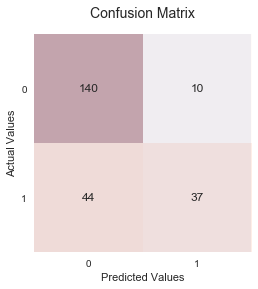

The average model accuracy score is: 77.013% 
The average accuracy score standard deviation is:0.957%


In [22]:
# Printing classification report
print(classification_report(y_test,nn_predictions))


# Confusion matrix plot
cm_nn = confusion_matrix(y_test,nn_predictions)
fig= plot_confusion_matrix(conf_mat=cm_nn,figsize=(4,4),cmap=plt.cm.Reds,hide_spines=True)
plt.title('Confusion Matrix',fontsize=14)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.grid('off')
plt.show()

# Print results for the model after it has been cross validated.
print("%s: %.3f%% " % ('The average model accuracy score is', (numpy.mean(cvscores))))
print("The average accuracy score standard deviation is:%.3f%%" %  numpy.std(cvscores))


## 8). XGBoost

             precision    recall  f1-score   support

          0       0.83      0.80      0.81       150
          1       0.65      0.69      0.67        81

avg / total       0.77      0.76      0.76       231



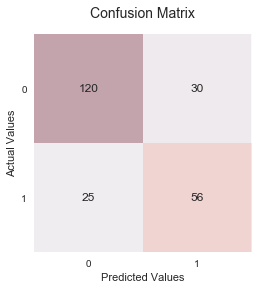

The average model accuracy score is : 74.30%
The average accuracy score standard deviation is : 8.508%
The area under the Reciver Operating Characteristic curve is:  0.84


In [34]:
# Importing the libraries for the XGBoost algorithm

from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
classifier(xgb_classifier,X_train,y_train,X_test,y_test)

## Model Scores

In [46]:
Model_Scores ={'Logistic Regression':{'10 Fold Cross Validation Score':
                                      "{0:.2%}".format((cross_val_score(estimator= log_reg,X= X_train,y=y_train,cv=10)).mean()), 
                                      'Standard Deviation':"{0:.2%}".format((cross_val_score(estimator= log_reg,X= X_train,y=y_train,cv=10)).std())},
                'Decision Trees':{'10 Fold Cross Validation Score':"{0:.2%}".format((cross_val_score(estimator= dtree,X= X_train,y=y_train,cv=10)).mean()),
                                     'Standard Deviation':"{0:.2%}".format(((cross_val_score(estimator= dtree,X= X_train,y=y_train,cv=10)).std()))},
                'Random Forest':{'10 Fold Cross Validation Score':"74.86%", 
                                 'Standard Deviation':"5.85%"},
                'Support Vector Machines':{'10 Fold Cross Validation Score':"{0:.2%}".format((cross_val_score(estimator= sv_model,X= X_train,y=y_train,cv=10)).mean()), 
                                           'Standard Deviation':"{0:.2%}".format(((cross_val_score(estimator= sv_model,X= X_train,y=y_train,cv=10)).std()))},
                'K Nearest Neighbors':{'10 Fold Cross Validation Score':"{0:.2%}".format((cross_val_score(estimator= knn,X= X_train,y=y_train,cv=10)).mean()), 
                                       'Standard Deviation':"{0:.2%}".format(((cross_val_score(estimator= knn,X= X_train,y=y_train,cv=10)).std()))},
                'Naive Bayes': {'10 Fold Cross Validation Score':"{0:.2%}".format((cross_val_score(estimator= nb,X= X_train,y=y_train,cv=10)).mean()), 
                                'Standard Deviation':"{0:.2%}".format(((cross_val_score(estimator= knn,X= X_train,y=y_train,cv=10)).std()))},
                'Neural Networks':{'10 Fold Cross Validation Score':"{0:.2f}%".format(numpy.mean(cvscores)), 
                                   'Standard Deviation':"{0:.2f}%".format(numpy.std(cvscores))},
                'XGBoost':{'10 Fold Cross Validation Score':"{0:.2%}".format((cross_val_score(estimator= xgb_classifier,X= X_train,y=y_train,cv=10)).mean()), 
                           'Standard Deviation':"{0:.2%}".format(((cross_val_score(estimator= xgb_classifier,X= X_train,y=y_train,cv=10)).std()))},                 
              }
Model_Scores= pd.DataFrame(Model_Scores)
Model_Scores

,Decision Trees,K Nearest Neighbors,Logistic Regression,Naive Bayes,Neural Networks,Random Forest,Support Vector Machines,XGBoost
10 Fold Cross Validation Score,68.36%,76.34%,77.09%,74.66%,77.01%,74.86%,73.92%,74.30%
Standard Deviation,6.27%,3.59%,4.31%,3.59%,0.96%,5.85%,5.69%,8.51%


It looks like most of these algorithms performed performed similarly when comparing the 10 fold cross validation accuracy scores, with the exception being the Decision Trees algorithm achieving a 68.36% accuracy score which is lower then the rest of the algortims. Other techniques will be used to see if the parameters for some of these algorithms can be improved.

## Optiminzing Paramaters with Grid Search

In [35]:
# Using Grid Search to optimize parameters

#First we import the libraries.

from sklearn.grid_search import GridSearchCV

### Grid Search for Random Forest Classifier

In [26]:
# Looking for best parameters for the Random Forest Algorithm


# We'll be optimizing the vaules
forest_param = {'n_estimators':[1,50,],'min_samples_split':[10,0.1],
               'min_samples_leaf':[10,0.1],'max_features':[1.0]}

# Fitting the GridSearch algorithm while searching for the best parameter values.
forest_grid = GridSearchCV(RandomForestClassifier(),forest_param,verbose=0)
forest_grid.fit(X_train,y_train)
forest_grid.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1.0, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

             precision    recall  f1-score   support

          0       0.82      0.85      0.84       150
          1       0.70      0.67      0.68        81

avg / total       0.78      0.78      0.78       231



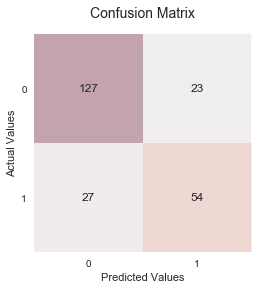

The average model accuracy score is : 75.78%
The average accuracy score standard deviation is : 6.842%
The area under the Reciver Operating Characteristic curve is:  0.84


In [27]:
# Using the results from the optimized parameters to see if the Support Vector machine algorithm results improve.

forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1.0, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

classifier(forest,X_train,y_train,X_test,y_test)

Optimizing the parameters for the Random Forest algorithm did not improve accuracy results.

### Grid Search for Support Vector Machines (SVM)

In [28]:
# Looking for best parameters for the Support vector classifier

# We'll be optimizing the vaules of the parameters C and gamma
sv_param={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}

# Fitting the GridSearch algorithm while searching for the best parameter values.
sv_grid = GridSearchCV(SVC(),sv_param,verbose=0)
sv_grid.fit(X_train,y_train)
sv_grid.best_estimator_


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

             precision    recall  f1-score   support

          0       0.79      0.88      0.83       150
          1       0.72      0.57      0.63        81

avg / total       0.77      0.77      0.76       231



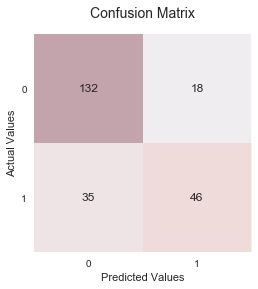

The average model accuracy score is : 77.27%
The average accuracy score standard deviation is : 4.555%
The area under the Reciver Operating Characteristic curve is:  0.85


In [29]:
# Using the results from the optimized parameters to see if the Support Vector machine algorithm results improve.

svc=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

classifier(svc,X_train,y_train,X_test,y_test)

Optimizing the parameters for the Support vector machine algorithm resulted in an increase of accuracy of roughly 4%.

### Grid Search for XGBoost algorithm

In [30]:
# Looking for best parameters for the XGBoost classifier

# We'll be optimizing the vaules 
xg_param={'max_depth': [3,5,10], 'min_child_weight': [1,3,12],
    'learning_rate': [0.3,0.01], 'n_estimators': [10,100], 'seed':[0], 'subsample':[0.5,0.8,0.9], 
          'colsample_bytree': [0.3,0.9],
    'gamma': [0.0001,0.001,0.01,1,10],      
    }

# Fitting the GridSearch algorithm while searching for the best parameter values.
xg_grid = GridSearchCV(XGBClassifier(),xg_param,verbose=0)
xg_grid.fit(X_train,y_train)
xg_grid.best_estimator_


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.0001, learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.5)

             precision    recall  f1-score   support

          0       0.82      0.85      0.83       150
          1       0.70      0.65      0.68        81

avg / total       0.78      0.78      0.78       231



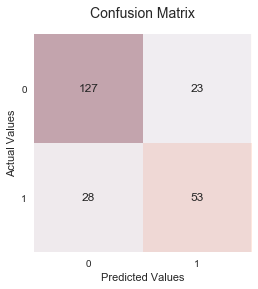

The average model accuracy score is : 74.66%
The average accuracy score standard deviation is : 6.758%
The area under the Reciver Operating Characteristic curve is:  0.85


In [31]:
#Using the results from the optimized parameters to see if the XGBoost algorithm results improve.

xg=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0.0001, learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.5)

classifier(xg,X_train,y_train,X_test,y_test)


It appears that optimizing the parameters didn't result in an increase in accuracy.

## Comparing Results with Optimized Parameters

In [49]:
Param_Scores ={'Random Forest':{'10 Fold Cross Validation Score':"74.86%", 
                                 'Standard Deviation':"5.85%"},
               'Support Vector Machines':{'10 Fold Cross Validation Score':"{0:.2%}".format((cross_val_score(estimator= sv_model,X= X_train,y=y_train,cv=10)).mean()), 
                                           'Standard Deviation':"{0:.2%}".format(((cross_val_score(estimator= sv_model,X= X_train,y=y_train,cv=10)).std()))},
               'XGBoost':{'10 Fold Cross Validation Score':"{0:.2%}".format((cross_val_score(estimator= xgb_classifier,X= X_train,y=y_train,cv=10)).mean()), 
                           'Standard Deviation':"{0:.2%}".format(((cross_val_score(estimator= xgb_classifier,X= X_train,y=y_train,cv=10)).std()))},
               'Optimized Random Forest':{'10 Fold Cross Validation Score':"75.78%", 
                                 'Standard Deviation':"6.84%"}, 
               'Optimized Support Vector Machines':{'10 Fold Cross Validation Score':"{0:.2%}".format((cross_val_score(estimator= svc,X= X_train,y=y_train,cv=10)).mean()), 
                                           'Standard Deviation':"{0:.2%}".format(((cross_val_score(estimator= svc,X= X_train,y=y_train,cv=10)).std()))},
              'Optimized XGBoost':{'10 Fold Cross Validation Score':"{0:.2%}".format((cross_val_score(estimator= xg,X= X_train,y=y_train,cv=10)).mean()), 
                           'Standard Deviation':"{0:.2%}".format(((cross_val_score(estimator= xg,X= X_train,y=y_train,cv=10)).std()))},
               }
Param_Scores= pd.DataFrame(Param_Scores)
Param_Scores

,Optimized Random Forest,Optimized Support Vector Machines,Optimized XGBoost,Random Forest,Support Vector Machines,XGBoost
10 Fold Cross Validation Score,75.78%,77.27%,74.66%,74.86%,73.92%,74.30%
Standard Deviation,6.84%,4.55%,6.76%,5.85%,5.69%,8.51%


As it can be seen optimizing the parameters of the algorithms increased the accuracy only for the Support Vector Machine algorithm. A quick look shows that Logistic Regression and Optimized Vector machines algorithm produced the highest level of accuracies. See table below for comparison.

In [47]:
Model_Scores

,Decision Trees,K Nearest Neighbors,Logistic Regression,Naive Bayes,Neural Networks,Random Forest,Support Vector Machines,XGBoost
10 Fold Cross Validation Score,68.36%,76.34%,77.09%,74.66%,77.01%,74.86%,73.92%,74.30%
Standard Deviation,6.27%,3.59%,4.31%,3.59%,0.96%,5.85%,5.69%,8.51%


# Conclusion

We can see that out of all the models tested, the Logistic Regression and the Support Vector with optimized parameters models performed the best. They both achieve an accuracy of roughly 77% and an area under the curve of the Reciver Operating Characteristic curve (ROC) of about 0.85. 

This dataset does not show extreme bias for the Class feature, however the training set was upsampled for the minority class using the SMOTE algorithm from the imbalanced library to see if employing this method would result in improved accuracy results. This was not the case, and the accuracies did not improve for any of the machine learning algorithms. Dimensinality reduction  through PCA (primary component analysis) was also tried. That also did not result in improved accuracy results. Feature selection (through backward or forward elimination) can be a method which may be worth trying to see if the accuracy improves. 